# Property Price Prediction

### Problem statement

A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

In [1]:
#we use 'numoy' for mathmatical operation on large, multidimentional arrays and matrices
#'pandas' is used for data manipulation and analysis
import numpy as np
import pandas as pd
#To check the data type we imoort 'is_string_dtype' and 'is_numeric_type'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#'matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt 
%matplotlib inline

#seaborn is used for plotting statistical models we use 'statsmodels'
import seaborn as sns

#to build and analyze various statistical models we use 'statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
#from statsmodels.stats.outliers_influence import variance_inflamation_factor

#'scikit-learn' emphasizes various regression, classification and clustring algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn import preprocessing

#to perform scientific computation
from scipy.stats import shapiro
from scipy import stats



In [2]:
##### supress the warnings
from warnings import filterwarnings
filterwarnings('ignore')

#set the plot size using 'rcParams'
#once the plot size is set using 'rcParams' is sets of all the fatchcoming plot in the file
#15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize']=[15,8]

In [3]:
#display all columns of the dataframe
pd.options.display.max_columns=None

#display all rows of the dataframe
pd.options.display.max_rows=50

#use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

## READ DATA

In [4]:
#rading csv file using pandas
data=pd.read_csv("HousePrices.csv")

In [5]:
data.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
data.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object

In [8]:
#from the above output, we can few few columns have data type int64 but as per
#data defintion its categorical variable, so we need to convert it data type 'object'.
data['Dwell_Type']=data['Dwell_Type'].astype('O')
data['OverallQual']=data['OverallQual'].astype('O')
data['OverallCond']=data['OverallCond'].astype('O')

In [9]:
#checking the converted data type for each columns
data[['Dwell_Type','OverallQual','OverallCond']].dtypes

Dwell_Type     object
OverallQual    object
OverallCond    object
dtype: object

In [10]:
#removing 'id' columns thats not gonna be important for analysis
data.drop(['Id'], axis=1, inplace=True)

In [11]:
data.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [12]:
#checking summary stats of all variable
#by default the descibe function returns the summary of numerical variables
data.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
#For gettimg statistical summary of categorical variables
data.describe(include=object)

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [14]:
data["Dwell_Type"].value_counts().count()

15

##### As, the variable PoolQC has only 8 non-zero out of 1461 observations. And also the variable PoolArea contains the area of these 8 Pools, we will remove the variables PoolQC and PoolArea.

In [15]:
#use drop() to drop the reduntant variables
# 'axis=1' drops the corresponding columns
data=data.drop(['PoolQC','PoolArea'],axis=1)

#re-check the shape of the dataframe
data.shape

(1460, 78)

## DIistribution of Variables

### Distribution of numeric variables

In [16]:
#filter the numerical  features in the dataset using select_dtypes()
#include=np.number is used to select the numeric features
data_features=data.select_dtypes(include=np.number)

#display the numeric features
data_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

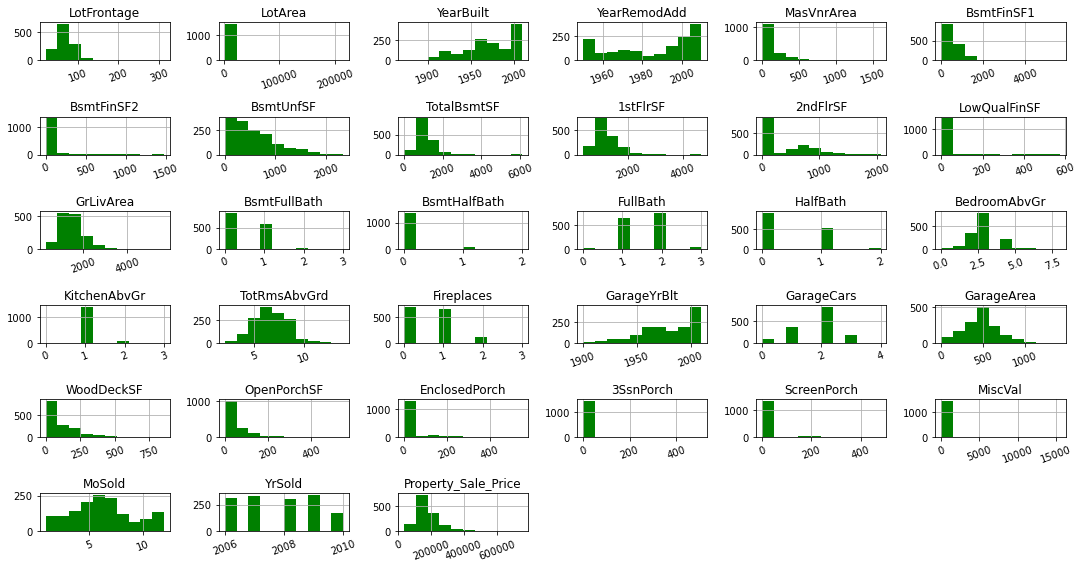

In [17]:
#plot the histogram of numeric variables
#hist() by default considers the numeric variables only,
#rotate the x-axis labels by 20 degree using the parameter, 'xrot'
data.hist(xrot=20,color="green")

#adjust the subplot
plt.tight_layout()

#display the plot
plt.show()

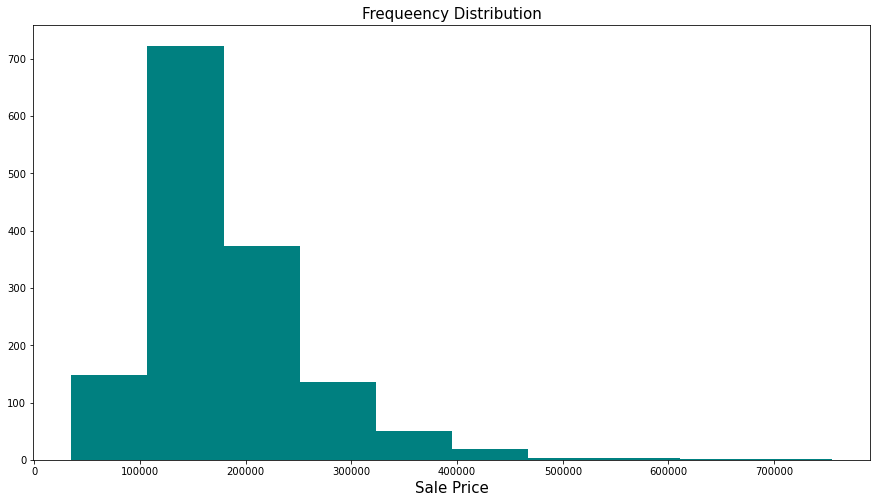

In [18]:
#Sale price frequency distribution
#set the xlabel and the fonsize
plt.xlabel("Sale Price",fontsize=15)

#set the ylabel and the fontsize
plt.title("Frequeency Distribution", fontsize=15)

#plot the histogram for the target variable
plt.hist(data["Property_Sale_Price"],color='teal')
plt.show()

#### The above plot showing the target variable 'Property_Sale_Price' is right skewed

### DISTRIBUTION OF CATEGORICAL VARIABLE

##### FOR THE CATEGORICAL VARIABLES, WE PLOT THE COUNTPLOT

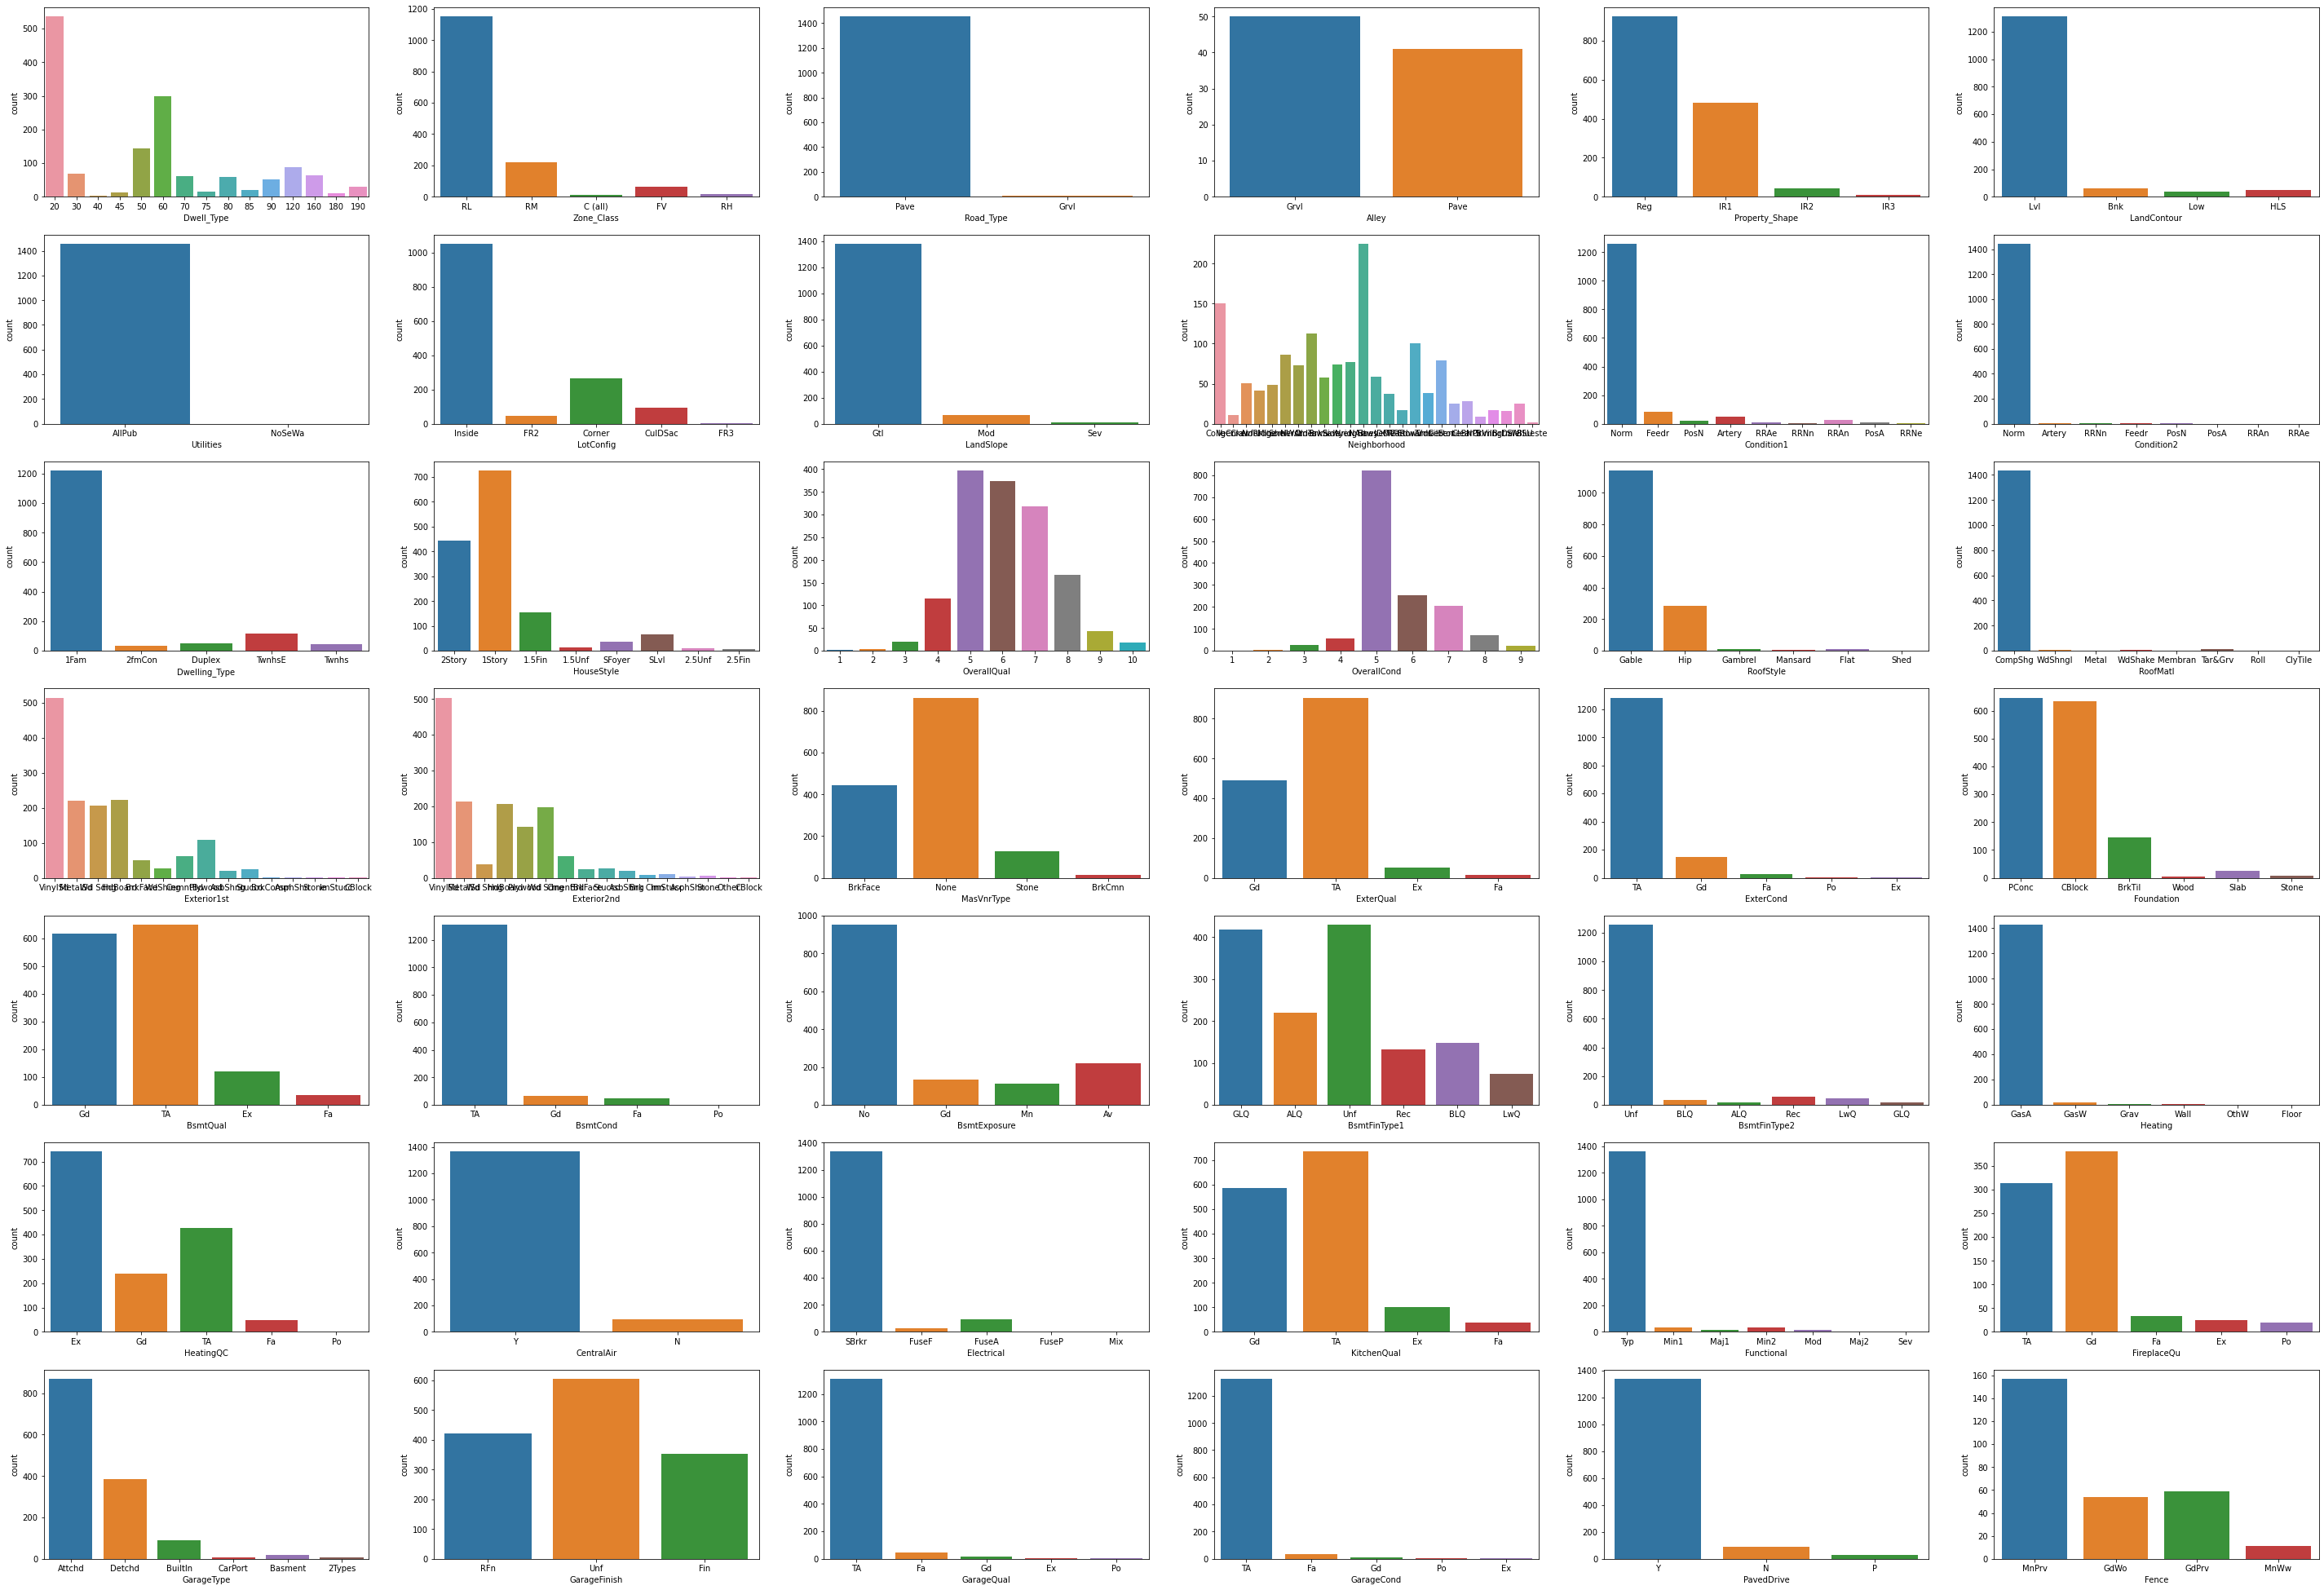

In [19]:
#Create an empty list to store all the categorical variables 
categorical=[]

#check the data type of each variable
for column in data:
    
    #check if the variables has the categorical type
    if is_string_dtype(data[column]):
        
        #append the categorical variables to the list 'categorical'
        categorical.append(column)
 
#plot the count plot for each categorical variable
#'figsize' sets the figure size
fig,ax=plt.subplots(nrows=7,ncols=6,figsize=(50,35))

#plot the count plot using countplot()b for each categorical variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable],ax=subplot)
    
#display the plot
plt.show()

#### Boxplot of OverallQuality and Property_Sale_Price(Bi-Variate Analysis)

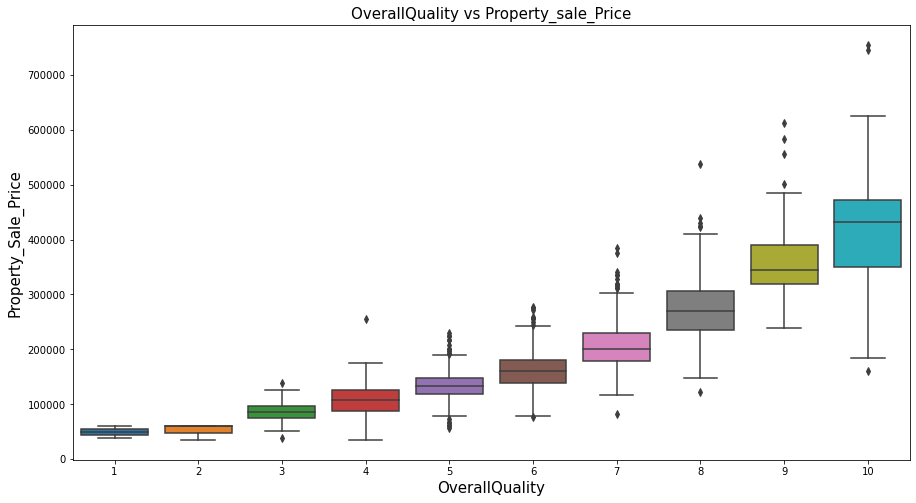

In [20]:
#draw the boxplot OverallQuality and the Project_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallQual", data=data)

#set the title of the plot and the fontsize
plt.title("OverallQuality vs Property_sale_Price",fontsize=15)

#Set the xlabel and the fontsize
plt.xlabel("OverallQuality",fontsize=15)

#set the ylabel and fontsize
plt.ylabel("Property_Sale_Price",fontsize=15)

#display the plot
plt.show()

### Draw the pairplot for numeric variable

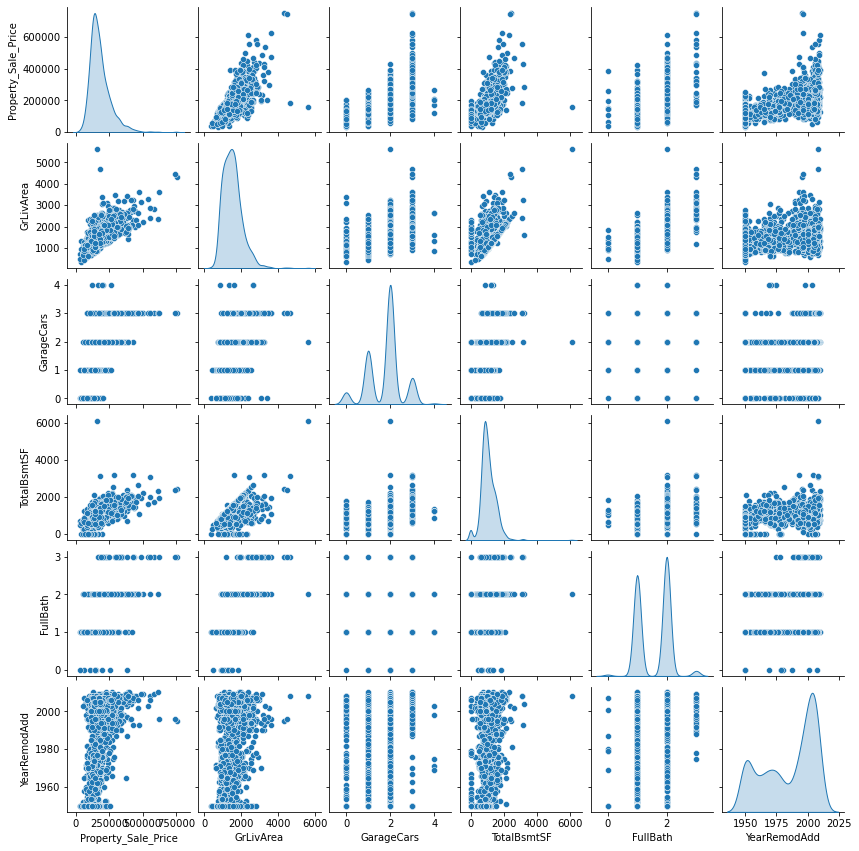

In [21]:
#Selecting the column of pairplot
columns=["Property_Sale_Price","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearRemodAdd"]
#draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(data[columns],size=2, kind="scatter", diag_kind="kde")
#display the plot
plt.show()

## Outliers Discovery

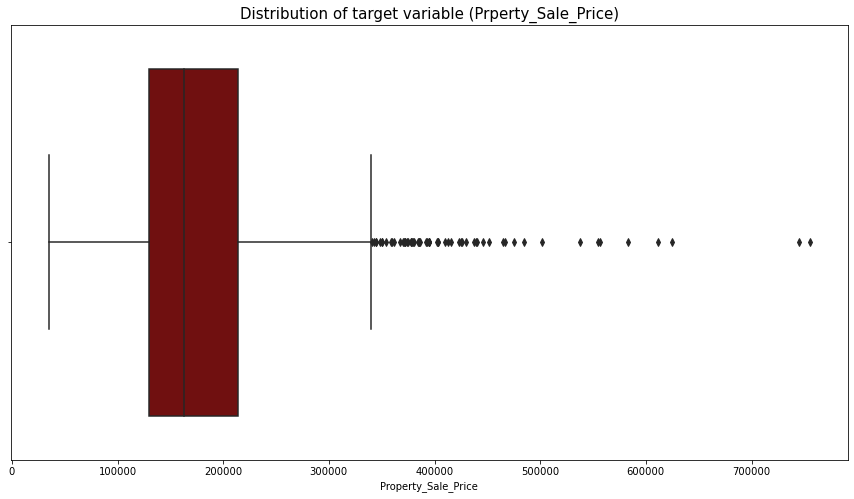

In [22]:
#plot a boxplot of target variable to detect the outliers
sns.boxplot(data['Property_Sale_Price'], color='maroon')

#set plot label
#set text size using 'fontsize'
plt.title('Distribution of target variable (Prperty_Sale_Price)', fontsize=15)

#display the plot
plt.show()

###### From the above plot we can see that there are outliers present in the target variable 'Property_Sale_Price'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [23]:
#remove the observation with the house price greater than or equal to 500000
data=data[data['Property_Sale_Price']<500000]

#check the dimension of shape
data.shape

(1451, 78)

## Missing Values

In [24]:
#'isnull().sum()' returns the missing values in each variable
#'ascending=False': sorts values in the descending order
total_nulls=data.isnull().sum().sort_values(ascending=False)

#calculate the percentage of missing values
percent_null=(data.isnull().sum()*100/data.isnull().count())
percent_null=percent_null.sort_values(ascending=False)

#concat the 'total_nulls' and 'percent_null' columns
#axis=1 stands for columns
missing_values=pd.concat([total_nulls,percent_null],axis=1, keys=['Total Nulls','Percentage of missing values'])

#add the column containing data type of each variable
missing_values['Data Type']=data[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of missing values,Data Type
MiscFeature,1397,96.278429,object
Alley,1360,93.728463,object
Fence,1171,80.702963,object
FireplaceQu,690,47.553411,object
LotFrontage,259,17.849759,float64
...,...,...,...
TotalBsmtSF,0,0.000000,int64
Heating,0,0.000000,object
Zone_Class,0,0.000000,object
CentralAir,0,0.000000,object


In [25]:
missing_values.index

Index(['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt',
       'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'HalfBath', 'BsmtFullBath',
       'BsmtHalfBath', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd',
       'Functional', 'KitchenAbvGr', 'KitchenQual', 'Dwell_Type', 'Fireplaces',
       'LowQualFinSF', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GrLivArea',
       'HeatingQC', '2ndFlrSF', 'YearBuilt', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', '1stFlrSF',
       'RoofStyle', 'RoofM

In [26]:
missing_values

,Total Nulls,Percentage of missing values,Data Type
MiscFeature,1397,96.278429,object
Alley,1360,93.728463,object
Fence,1171,80.702963,object
FireplaceQu,690,47.553411,object
LotFrontage,259,17.849759,float64
...,...,...,...
TotalBsmtSF,0,0.000000,int64
Heating,0,0.000000,object
Zone_Class,0,0.000000,object
CentralAir,0,0.000000,object


### Handle the missing values for numerical variable

In [27]:
#filter out the categorical variables and consider only the numeric variable with missing values
num_missing_values=missing_values[(missing_values['Total Nulls'] > 0) &(missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of missing values,Data Type
LotFrontage,259,17.849759,float64
GarageYrBlt,81,5.582357,float64
MasVnrArea,8,0.551344,float64


#### for the numerical variables, we can replace the missing values by their mean, median or mode as per the reqirement

### The variable 'LotFrontage' is right skewed and thus we will the missing values with it's median values 

In [28]:
#use the function fillna() to fill the missing values
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())

#### we will replace the missing values in the numeric variable 'GarageYrBlt' by 0. The missing values in this variable indicates that there are 81 observation for which garage facility is not available

In [29]:
#use the function fillna() to replace mising values in 'GarageYrBlt' with 0
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

#### The variable 'MasVnrArea' is positively skewed and thus we will fill the missing values with it's median value

In [30]:
#use the function fillna() to fill the missingf values
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].median())

### Handling the missing valuess for categorical variable

In [31]:
#filter out the numerical variables and consider the only the categorical variables with missing values
cat_missing_values=missing_values[(missing_values['Total Nulls']>0) & (missing_values['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of missing values,Data Type
MiscFeature,1397,96.278429,object
Alley,1360,93.728463,object
Fence,1171,80.702963,object
FireplaceQu,690,47.553411,object
GarageType,81,5.582357,object
GarageFinish,81,5.582357,object
GarageQual,81,5.582357,object
GarageCond,81,5.582357,object
BsmtFinType2,38,2.618884,object
BsmtExposure,38,2.618884,object


In [32]:
#according to the data difintion, 'NA' denotes  the absence of miscellaneous feature
#replace NA values in 'MiscFeature' with a valid value, 'None'
data['MiscFeature'] = data['MiscFeature'].fillna('None')

#replace NA values in 'Alley' with a valid value, 'No alley access'
data['Alley']=data['Alley'].fillna('No alley access')

#replace NA values in 'Fence' with a valid value, 'No Fence'
data['Fence']=data['Fence'].fillna('No Fence')

#replace null values in 'FireplaceQu' with a valid value 'No Fireplace'
data['FireplaceQu']=data['FireplaceQu'].fillna('No Fireplace')



In [33]:
#replace the missing values in the categoric variables representing the garage by 'No Garage'
for col in ['GarageType','GarageFinish', 'GarageCond', 'GarageQual']:
    data[col].fillna('No Garage',inplace=True)

In [34]:
#according to the data difintion, 'NA' denotes the absence of basement in the variables 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2 
#replace the missing values in the categprical variable representing the basement by 'No Basement'
for col in['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond','BsmtFinType1']:
    data[col].fillna('No Basement', inplace=True)

In [35]:
#according to the difintion, 'NA' denotes the absence of masonry veneer
#replace the missing values in the categorical variable 'MasVnrType' with a value, 'None'
data['MasVnrType']=data['MasVnrType'].fillna('None')

In [36]:
#replace the missing values in the categorical variable 'Electrical' with it's mode 
mode_electrical = data['Electrical'].mode()
data['Electrical'].fillna(mode_electrical[0],inplace=True)

## CORRELATION

In [37]:
#use the corr() function to generate the correlation matix of the numeric variables 
corrmat=data.corr()

#print the correlation matrix
corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.306226,0.110575,0.078240,0.168580,0.201974,0.041758,0.122341,0.351744,0.403928,0.055154,0.038892,0.352795,0.087810,-0.009650,0.166976,0.039602,0.233933,-0.003219,0.311321,0.223229,0.097975,0.261254,0.317880,0.073205,0.133322,0.013371,0.063617,0.035947,0.000464,0.015944,0.009395,0.318744
LotArea,0.306226,1.000000,0.007052,0.007963,0.079576,0.204725,0.113638,-0.002229,0.253819,0.293575,0.033593,0.005727,0.248741,0.154564,0.047356,0.111174,0.006873,0.114221,-0.016372,0.175347,0.268811,0.071133,0.145224,0.171107,0.159650,0.084143,-0.015829,0.021493,0.032825,0.039093,0.003327,-0.016991,0.252156
YearBuilt,0.110575,0.007052,1.000000,0.590358,0.308832,0.242388,-0.050381,0.147484,0.385072,0.272635,0.002106,-0.183659,0.188173,0.185755,-0.039128,0.464424,0.239822,-0.073171,-0.174064,0.081196,0.140979,0.271118,0.533519,0.474181,0.223873,0.186221,-0.386450,0.032225,-0.057585,-0.033934,0.016370,-0.016129,0.543898
YearRemodAdd,0.078240,0.007963,0.590358,1.000000,0.170015,0.120246,-0.069146,0.179966,0.284008,0.232100,0.136997,-0.061920,0.283858,0.117521,-0.012512,0.436448,0.180804,-0.041872,-0.148847,0.181722,0.106649,0.145115,0.416036,0.366411,0.205597,0.224186,-0.192517,0.046070,-0.045230,-0.009821,0.025102,0.033392,0.531708
MasVnrArea,0.168580,0.079576,0.308832,0.170015,1.000000,0.237426,-0.070851,0.116437,0.340365,0.318259,0.150374,-0.069527,0.358948,0.078313,0.015343,0.251721,0.192394,0.099591,-0.036336,0.254011,0.238226,0.133385,0.351166,0.357034,0.145807,0.122038,-0.108352,0.022121,0.057424,-0.029244,0.005738,-0.010231,0.436515
BsmtFinSF1,0.201974,0.204725,0.242388,0.120246,0.237426,1.000000,-0.054443,-0.502348,0.506796,0.427145,-0.160550,-0.064339,0.177440,0.652108,0.065858,0.039019,-0.003163,-0.108698,-0.080020,0.016513,0.245847,0.114548,0.209144,0.283615,0.202566,0.112177,-0.099877,0.028548,0.057946,0.004795,-0.010615,0.008691,0.357076
BsmtFinSF2,0.041758,0.113638,-0.050381,-0.069146,-0.070851,-0.054443,1.000000,-0.211681,0.101582,0.096551,-0.096758,0.014921,-0.008304,0.158017,0.072546,-0.076080,-0.029227,-0.012647,-0.040788,-0.036589,0.044752,0.035023,-0.039581,-0.017447,0.071761,0.003118,0.036869,-0.030038,0.085238,0.005002,-0.014359,0.030290,-0.014028
BsmtUnfSF,0.122341,-0.002229,0.147484,0.179966,0.116437,-0.502348,-0.211681,1.000000,0.422596,0.322023,-0.000493,0.028657,0.243351,-0.421408,-0.099057,0.286674,-0.044902,0.162806,0.030833,0.248991,0.050762,0.042190,0.212905,0.182243,-0.006586,0.125145,-0.001601,0.021199,-0.017503,-0.023749,0.039297,-0.038680,0.223991
TotalBsmtSF,0.351744,0.253819,0.385072,0.284008,0.340365,0.506796,0.101582,0.422596,1.000000,0.811904,-0.204218,-0.032078,0.431501,0.306906,-0.005712,0.306182,-0.060332,0.048934,-0.067111,0.258892,0.325182,0.175850,0.421578,0.476076,0.231374,0.246494,-0.091925,0.040230,0.074462,-0.017485,0.023853,-0.019244,0.596771
1stFlrSF,0.403928,0.293575,0.272635,0.232100,0.318259,0.427145,0.096551,0.322023,0.811904,1.000000,-0.233737,-0.012656,0.549128,0.242725,-0.003996,0.364846,-0.133999,0.127177,0.072909,0.389025,0.398710,0.165628,0.426446,0.478290,0.233657,0.209754,-0.061071,0.059149,0.081669,-0.020172,0.041838,-0.017273,0.589676


#### Plot the heatmap for the diagonal correlation matrix

###### A correlation matrix is a symmetric matrix. Plot only the upper triangular entries using a  heatmap

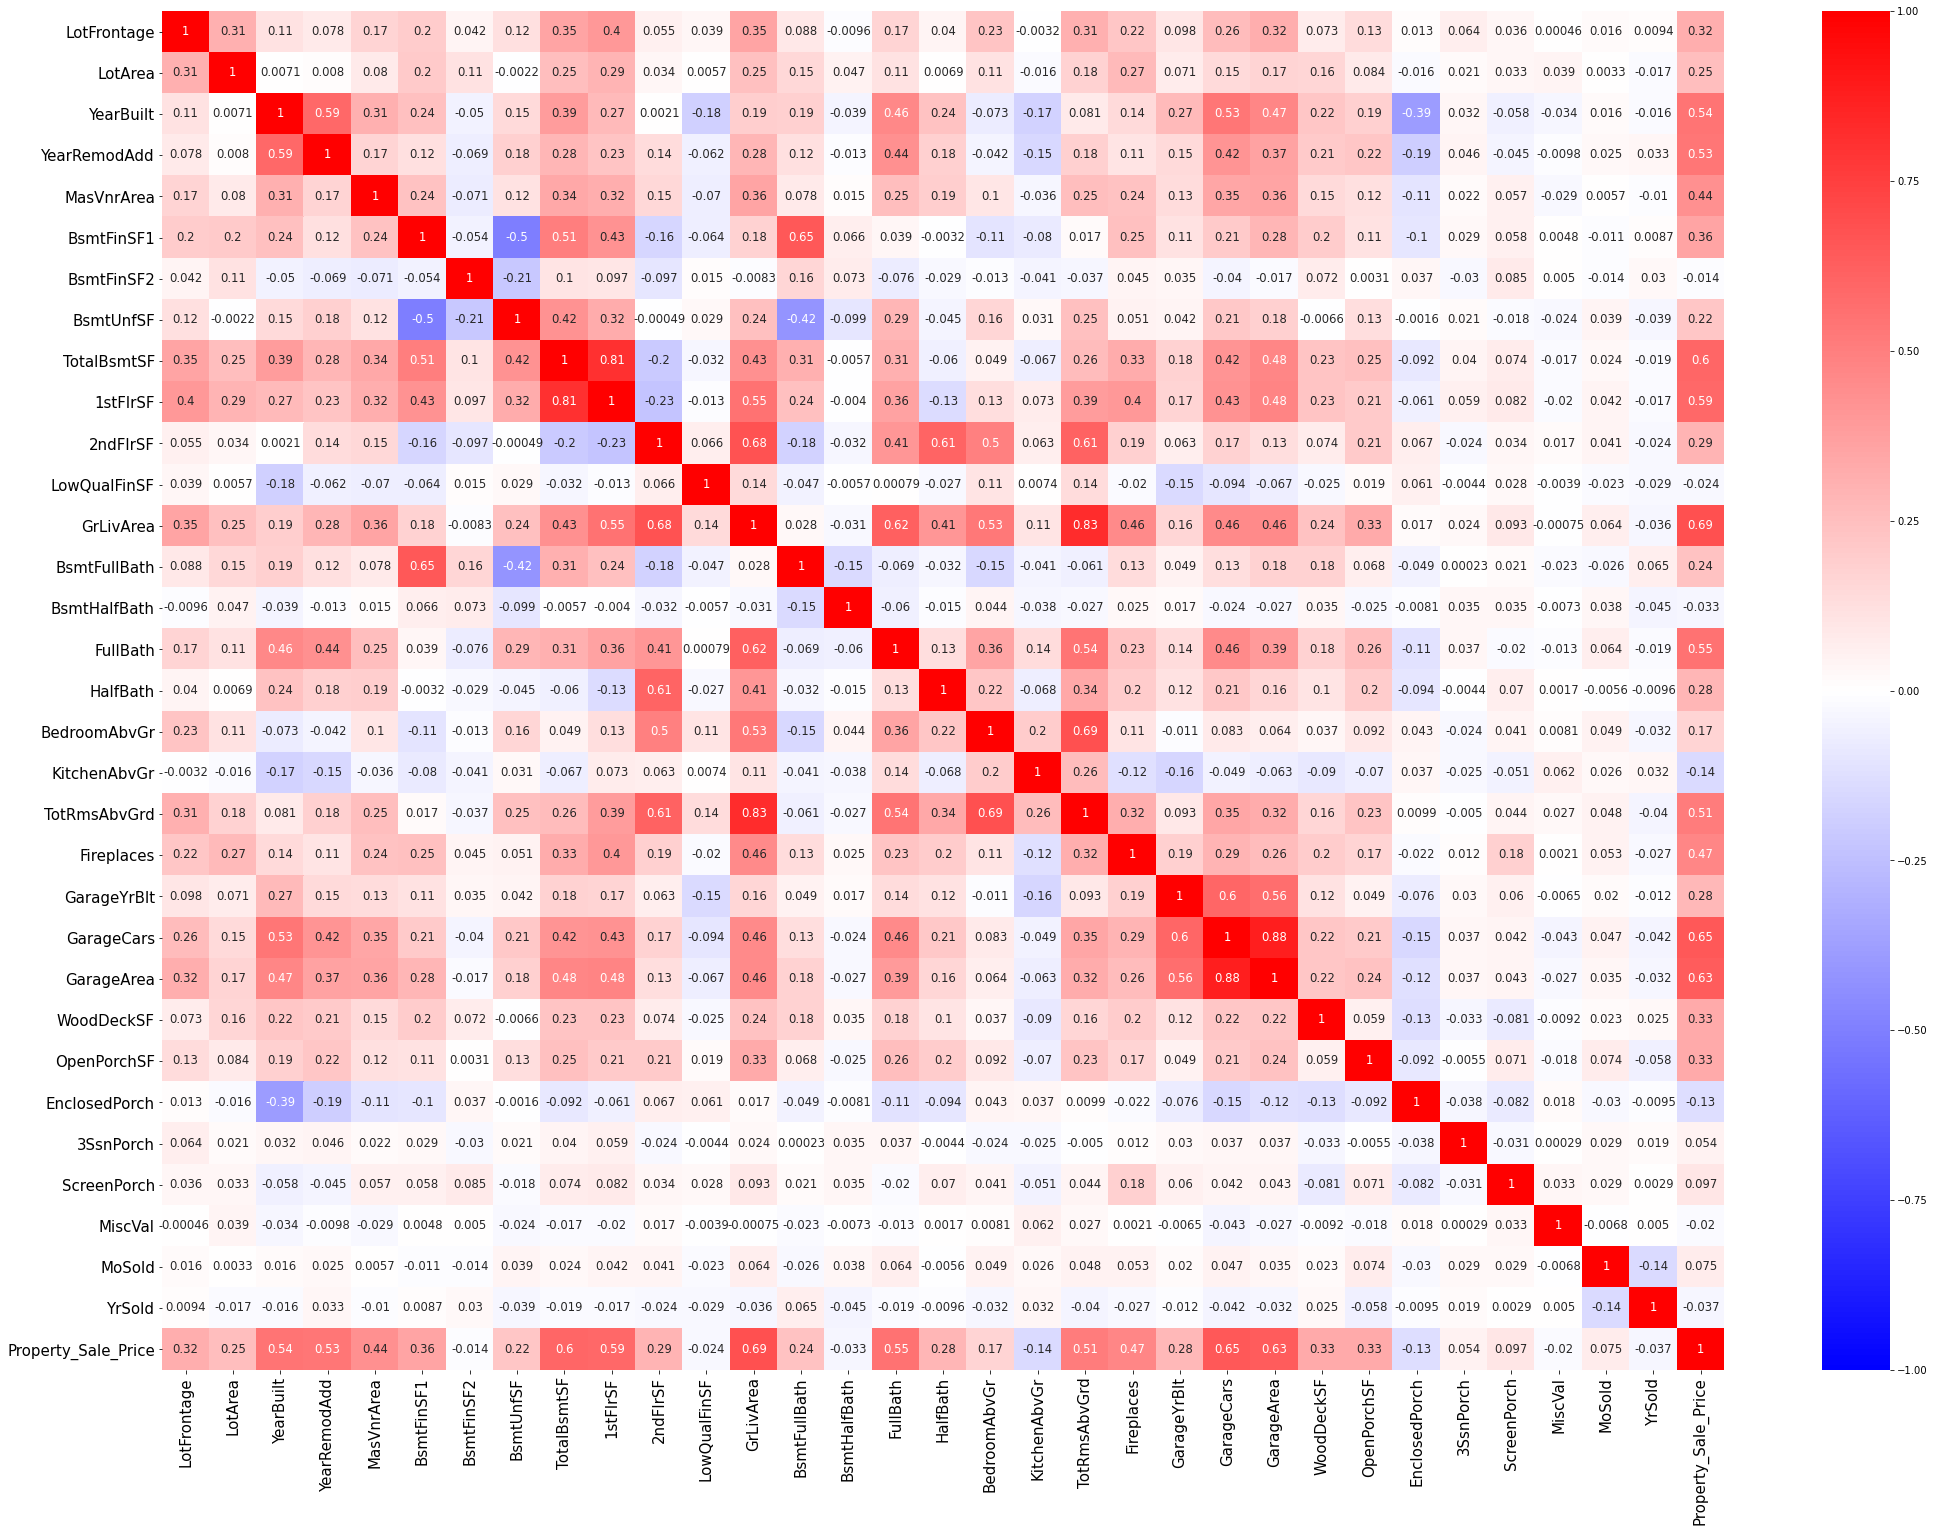

In [38]:
#set the plot size
plt.figure(figsize=(35,25))

#plot the heatmap
#corr: give the correlation matrix
#cmap: color code used for plotting
#annot_kws: sets the font_size of the annotation
#annot: prints the correlation values in the chart
#vmax: gives a maximum range of values for the chart
#vmin: gives a minimum range of values for the chart

sns.heatmap(corrmat, annot=True, vmax=1.0, vmin= -1.0, cmap = 'bwr', annot_kws={"size":11.6})

#set the size of x and y axes labels using 'fomtsize'
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)

#display the plot
plt.show()

## Analyze relationships betwen target and categorical variables

#### Plot the box-and-whisker plot for visualizing relationships between  target and categorical varibles

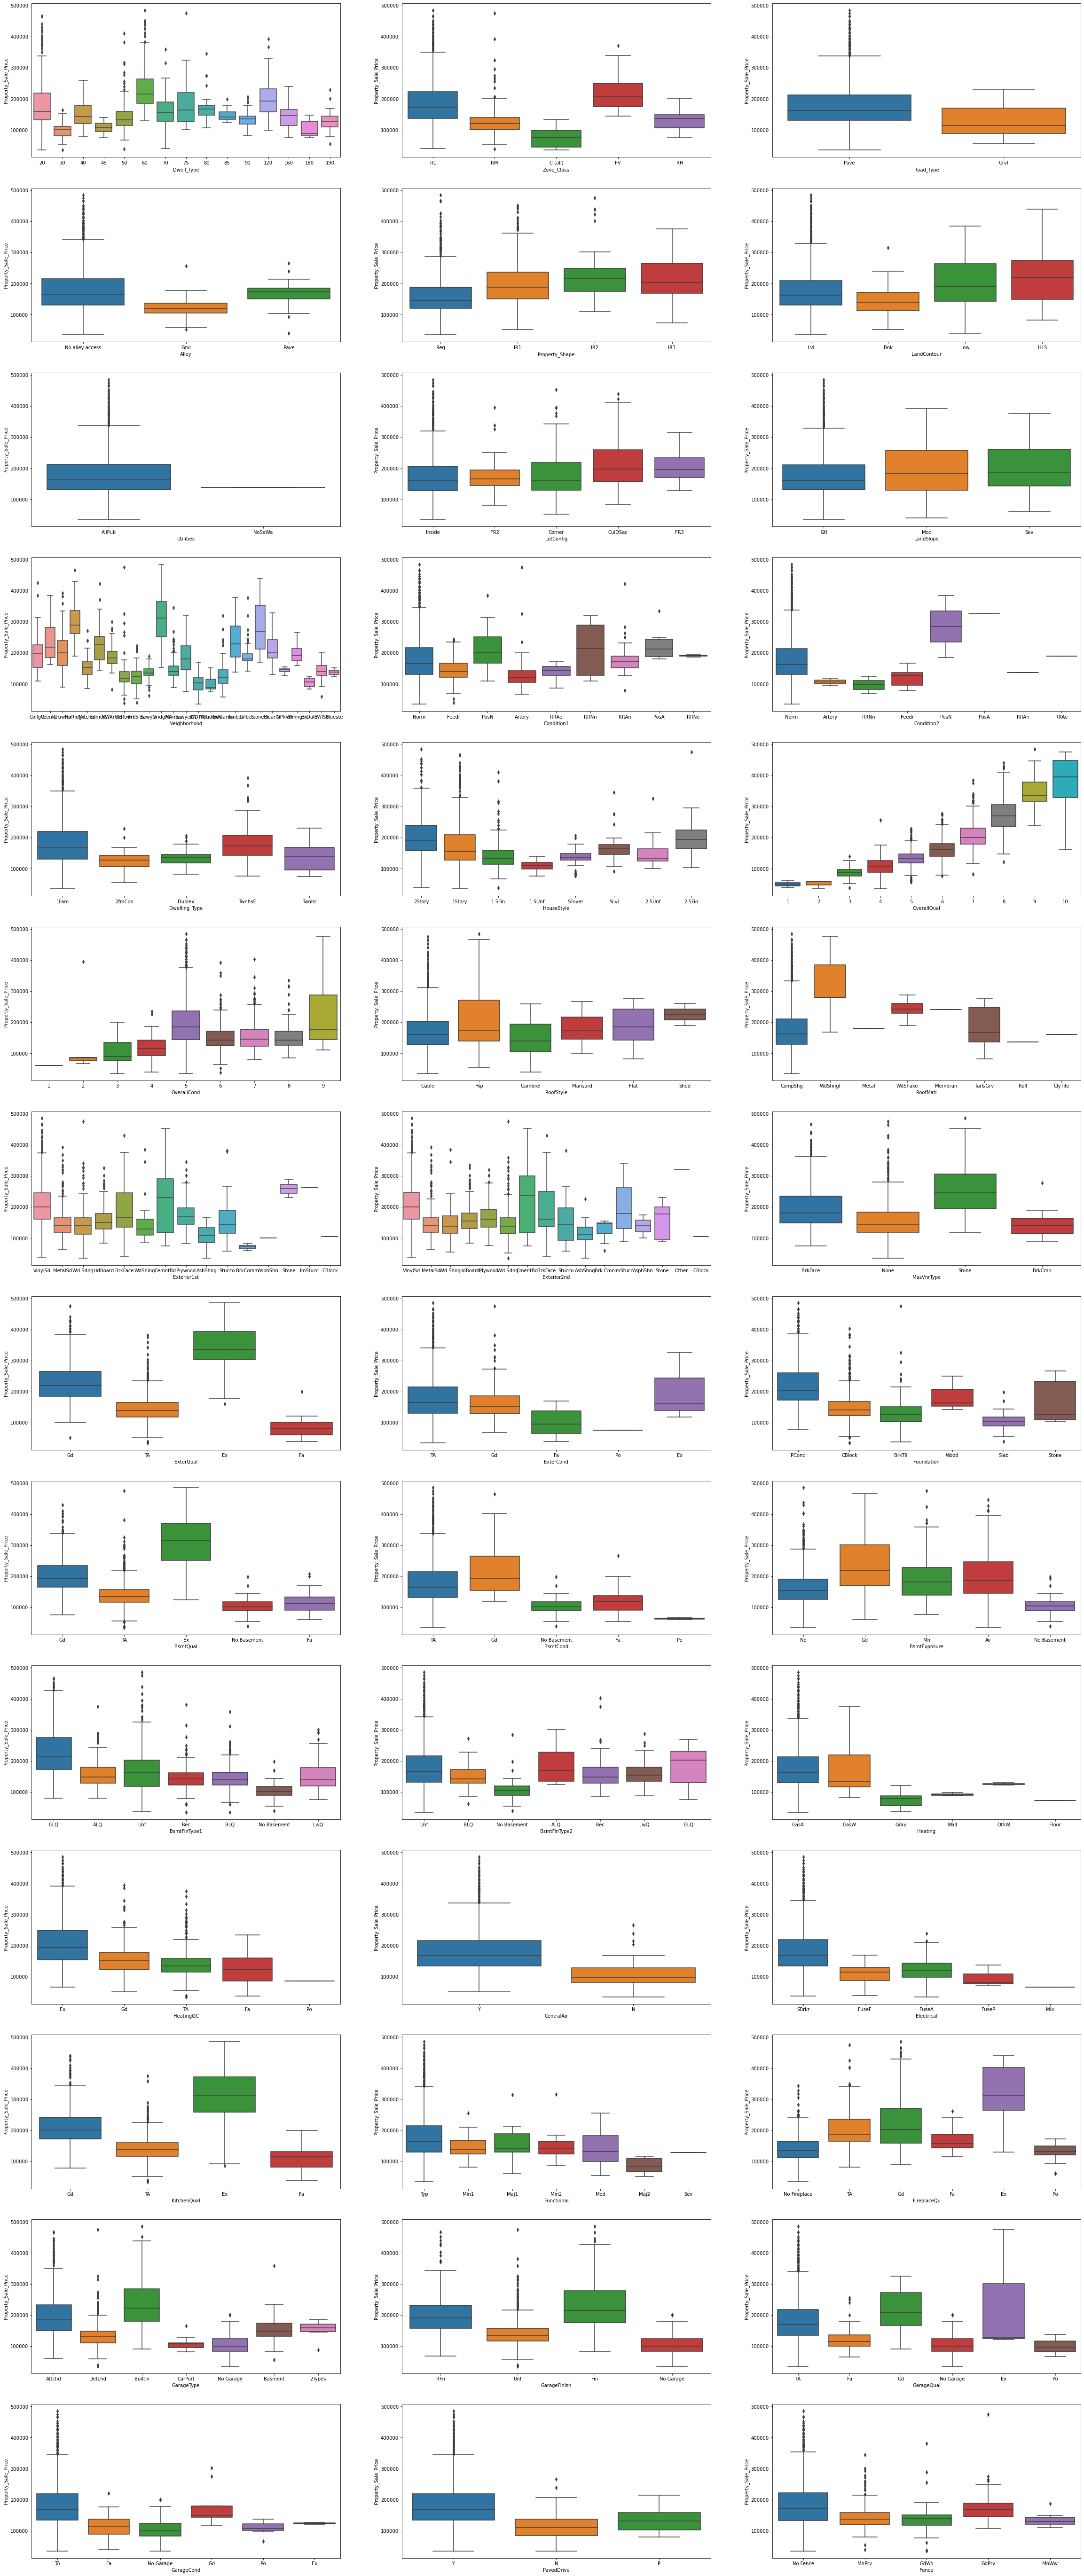

In [39]:
#create an empty list to store all the categorical variables 
categorical=[]

#check the data type of each variable
for column in data:
    
    #check if the variable has the categorcal data type
    if is_string_dtype(data[column]):
        
        #append the categorical variables to the list 'categorical'
        categorical.append(column)
#plot the boxplpot for each categorical and target variables
#'figsize' sets the figure size
fig, ax=plt.subplots(nrows=14, ncols=3,figsize=(40,100))

#plot rge boxplot for each categorical and targetv variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=variable, y='Property_Sale_Price',data=data, ax = subplot)

#display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that most of the categorical variables have an effect on the sale price of the property. The median sale price rises exponentially with respect to the rating of the overall quality of the material used.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

# DATA PREPRATION

### Check for Normality

#### Plot a histogram and also perform the Shapiro-Wilk test

We use the function `hist()` from the matplotlib library to plot a histogram.

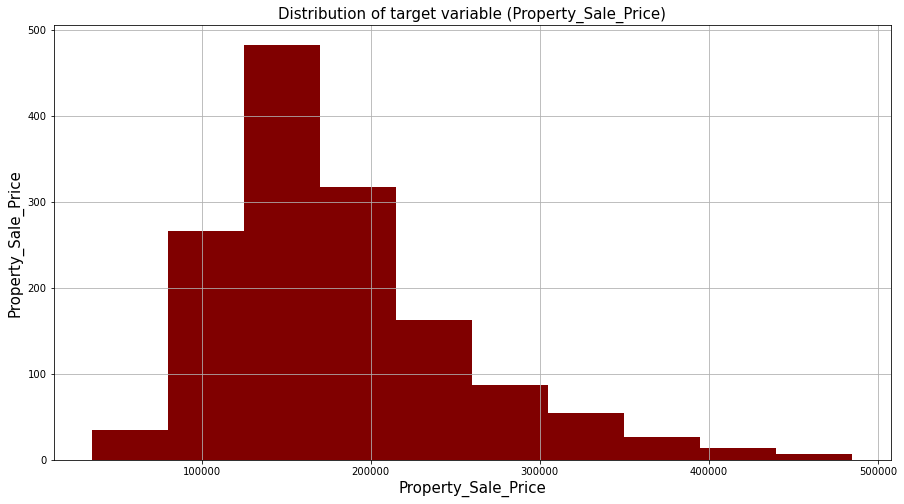

In [40]:
#check the ditribution of target variable
data.Property_Sale_Price.hist(color='maroon')

#add plot and axes labels
#set text size using 'fontsize'
plt.title('Distribution of target variable (Property_Sale_Price)', fontsize=15)
plt.xlabel('Property_Sale_Price', fontsize=15)
plt.ylabel('Property_Sale_Price', fontsize=15)

#display the plot 
plt.show()

<table align="left">
    <tr>
        <td width="8">
            <img src="infer.png">
        </td>
        <td>
            <div align ="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can see that the variable 'Property_Sale_Price' is positively skewed and thus we can sayb that it is not normally distributed.</b>
                    </font>
                </div>
            </td>
        </tr>
    </table>

Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate from hypothesis of `Shapiro-Wilk` test is as follows <br>
<p style='text-indent:25em'> <strong> H<sub>o</sub>: The data is normally distributed</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: The data is not normally distributed</strong> </p>

In [41]:
#shapiro() returns the test statistics along with the p-value of the test
stat, p= shapiro(data.Property_Sale_Price)

#print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics =%.3f, p-value=%3f' %(stat,p))

#set the level of significance (alpha) to 0.05
alpha=0.05

#if the p-value is less than alpha print we reject alpha
#if the p-value is greater than alpha print we accept alpha
if p>alpha:
    print('The data is normally distribututed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')
    

Statistics =0.919, p-value=0.000000
The data is not normally distributed (reject H0)


### if the data is normally distributed, use log transformation to reduce tge skewnes and get a near normally distributed data

In [42]:
#log transformation using np.log()
data['log_Property_Sale_Price']= np.log(data['Property_Sale_Price'])

#display the top 5 rows of the data
data.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


In [43]:
data[["Property_Sale_Price", "log_Property_Sale_Price"]].describe()

,Property_Sale_Price,log_Property_Sale_Price
count,1451.000000,1451.000000
mean,178272.872502,12.016082
std,71891.119458,0.387473
min,34900.000000,10.460242
25%,129900.000000,11.774520
50%,162500.000000,11.998433
75%,213000.000000,12.269047
max,485000.000000,13.091904


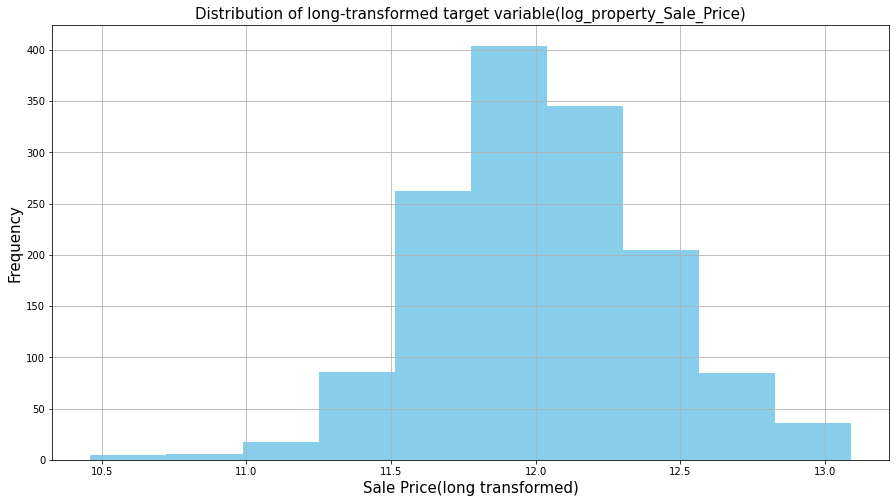

In [44]:
#Recheck for normality
#plot the histogram using hist
data.log_Property_Sale_Price.hist(color='skyblue')

#add plot and axes labels
#set text size using 'fontsize'
plt.title("Distribution of long-transformed target variable(log_property_Sale_Price)",fontsize=15)
plt.xlabel("Sale Price(long transformed)",fontsize=15)
plt.ylabel('Frequency',fontsize=15)

#display the plot
plt.show()

## Dummy Encode the categorical Varibles

We need to perform dummy encoding on our categorical variables before we proceed since the method of OLS works only on the numeric data.

#### Filter numerical and categorical variables

In [45]:
#filter out the numerical variables and consider only the numerical variables using (include=np.number)
data_numeric_features=data.select_dtypes(include=np.number)

#display categorical features 
data_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [46]:
#filter out the numeric variables and consider only the categorical variables using (include=object)
data_categoric_features=data.select_dtypes(include=object)

#display tge categorical feature
data_categoric_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Dummy encode the categorical variables

In [47]:
#to create dummy variables we use 'get_dummies()' from pandas
#to create (n-1) dummy variables we use 'drop_first=True'
dummy_encode_variables=pd.get_dummies(data_categoric_features, drop_first=True)

In [48]:
dummy_encode_variables

,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,

#### Concatenate numerical and dummy encoded categorical variables.

In [57]:
#concatenate the numerical and dummy encoded categorical variables column-wise
data_property_dummmy=pd.concat([data_numeric_features, dummy_encode_variables],axis=1)

#display data with dummy variables
data_property_dummmy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Det

In [50]:
#check the dimension of the dataframe
data_property_dummmy.shape

(1451, 285)

# Linear Regression (OLS)

### Multiple Linear Regression full model with log transformed dependent variable(OLS) 

#### 1) Split the data into training and test sets 

As the OLS function does not include the intercept term by defaut. Thus, we add the intercept the column to the dataset

In [63]:
#add the intercept column using 'add_constant()'
data_property_dummmy=sm.add_constant(data_property_dummmy)

#separate the independent and dependent variables
#drop(): drop the specified column

X=data_property_dummmy.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)

#extract the target variables from the dataset
Y=data_property_dummmy[['Property_Sale_Price', 'log_Property_Sale_Price']]

#split data into train data and test data
#what proportion of data should be included in test data is passsed using 'test_size'
#set 'random_state' to get same data each time the code is executed

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=1)

#chek the dimension of the train & test subset for
#print dimension of predictors train set
print("The shape of X_train", X_train.shape)

#print dimension of predictors test set
print("The shape of X_test is:", Y_test.shape)

#print the dimension of target train_set
print("The shape of Y_train is:",Y_train.shape)

#print dimension of target test set
print("The shape of Y_test is:",Y_test.shape)

The shape of X_train (1015, 284)
The shape of X_test is: (436, 2)
The shape of Y_train is: (1015, 2)
The shape of Y_test is: (436, 2)


### 2) Building model using sm.OLS().fit()

In [66]:
#building a full model ussing OLS()
#consider the log of sales price as the target variable 
#use fit() to fit the model on train data
linreg_log_model_full=sm.OLS(Y_train['log_Property_Sale_Price'],X_train).fit()

#print the summary output
print(linreg_log_model_full.summary())


                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.952
Model:                                 OLS   Adj. R-squared:                  0.935
Method:                      Least Squares   F-statistic:                     56.43
Date:                     Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                             15:28:27   Log-Likelihood:                 1089.1
No. Observations:                     1015   AIC:                            -1648.
Df Residuals:                          750   BIC:                            -343.7
Df Model:                              264                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This model explains around 95% of the variation in dependent variable log_Property_Sale_Price.
The condition number is 7.17e+19 suggests that there is severe multicolinearity in the data
The durbin-Watson test statistics is 1.934 i.e. close to 2.0 and thus it indicates that there is no autocorrelation


#### Condition Number:
Multicliniearity canbe checked  by computing the condition number(CN). If condition number is between 100 and 1000, there is moderate multicolinearity, if condition number is less that 100, there is no multicolinearity and if condition number is greater than 1000 there us severe multicolinearity in the data 

#### Durbin-Watson :
The Durbin-Watson statistic will always have a value between 0 and 4. A a value of 2.0 means that there is no autocorrelation detected in the sample. values from 0 to less than 2 indicate positive autocorrelation and values from 2 to 4 indicate negative autocorrelation.

#### 3) Predict the values using test set

In [152]:
#predict the'log_Property_Sale_Price' using predict()
Y_pred=linreg_log_model_full.predict(X_test)

In [153]:
Y_pred

1209    12.539617
531     11.688016
1096    11.720519
591     12.844611
37      12.001136
          ...    
229     12.133282
1230    12.326840
646     11.528903
1131    11.824424
529     12.497314
Length: 436, dtype: float64

Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()

In [154]:
#take the exponential of predictions using np.exp()
predicted_Property_Sale_Price=np.exp(Y_pred)

#extract the 'Property_Sale_Price' values from the dataset
actual_Property_Sale_Price=Y_test['Property_Sale_Price']

### 4) Compute accuracy measures

In [155]:
#calculate rmse using rmse()
rmse=rmse(actual_Property_Sale_Price,predicted_Property_Sale_Price)

#calculate R-squared using rsquared 
rsquared = linreg_log_model_full.rsquared

#calculate Adjusted R-Squared using rsquared_adj
rsquared_adj=linreg_log_model_full.rsquared_adj


#### Tabulate the results

In [163]:
#create the result table for accuracy scores
#accuracy measures considered for model camparison are RMSE, R-squared valye and Adjusted R-squared value
#create a list of columns names
cols=['Model', 'RMSE', 'R-Squared','Adj.R-Squared']

#create a empty dataframe of the columns
#columns : specifies the columns to be selected
result_tabulation=pd.DataFrame(columns=cols)

#compile the required information
logmodel_metrics=pd.Series({'Model': "Linereg full model with log of target variable",
                                        'RMSE':rmse,
                                        'R-Squared':rsquared,
                                        'Adj. R-Squared':rsquared_adj})

#append our result table using append()
#ignore_index=True: does not use the index labels
#python can only append a series if ignore_index=True or if the Series has a name
result_tabulation=result_tabulation.append(logmodel_metrics, ignore_index=True)

#print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linereg full model with log of target variable,37726.465264,0.952066,0.935193
